<a href="https://colab.research.google.com/github/pdpranavkumar/lecture1/blob/master/Bias_Variance_Trade_off_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import the libraries

In [2]:
import numpy as np
import pandas as pd
from numpy import math
import array as ay

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

In [12]:
np.random.seed(123)
MARKER_SIZE = 100
DATA_COLOR = 'black'
ERROR_COLOR = 'darkred'
POLYNOMIAL_FIT_COLORS = ['orange','royalblue','darkgreen']
LEGEND_FONTSIZE = 14
TITLE_FONTSIZE = 12
N_OBSERVATION = 10
NOISE_STD = 1

x = 2 * (np.random.rand(N_OBSERVATION) - .5)
x_grid = np.linspace(-1, 1, 100 )

def f(x):
  """"base function"""
  return np.sin(x * np.pi)

def sample_fx_data(shape, noise_std=NOISE_STD):
   return f(x) + np.random.randn(*shape) * noise_std

def plot_fx_data(y=None):
  """plot f(x) and noisy samples"""
  y = y if y is not None else sample_fx_data(x.shape)
  fig, axs = plt.subplots(figsize=(6,6))
  plt.plot(x_grid, f(x_grid), color=DATA_COLOR, label='f(x)') 
  plt.scatter(x, y, s=MARKER_SIZE,edgecolors=DATA_COLOR, facecolors='none', label='y')







#plot the data

(-2.0, 2.0)

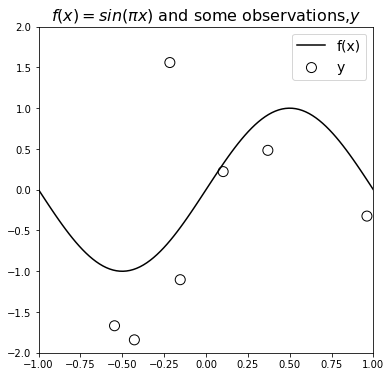

In [13]:
y = sample_fx_data(x.shape)
plot_fx_data(y)
plt.legend(fontsize=14)
plt.title(f'$f(x) = sin(\pi x)$ and some observations,$y$', fontsize=16)
plt.xlim([-1,1])
plt.ylim([-2, 2])

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [6]:
x

array([ 0.39293837, -0.42772133, -0.54629709,  0.10262954,  0.43893794,
       -0.15378708,  0.9615284 ,  0.36965948, -0.0381362 , -0.21576496])

In [7]:
y

array([ 2.20990384, -1.84107056, -1.66832743,  0.22215401,  2.4730462 ,
       -1.10346083, -0.32341389,  0.48297796,  2.0864081 ,  1.55966971])

Text(0.5, 1.0, 'Various polynomial function fit to observations')

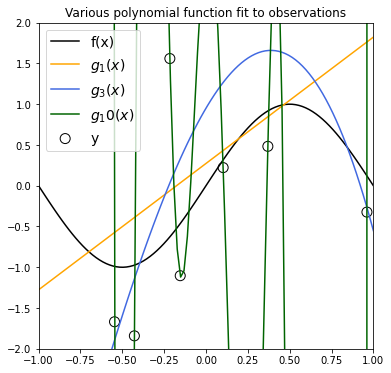

In [15]:
plot_fx_data(y)

polynomial_degees = [1, 3, 10]
theta = {}
fit ={}
for ii,degree in enumerate(polynomial_degees):
  #note: we should get an overconditioning warning for degree 10 because of extreme overfitting
  theta[degree] = np.polyfit(x,y,degree)
  fit[degree] = np.polyval(theta[degree],x_grid)
  # plt.figure(figsize=(10,10))
  plt.plot(x_grid, fit[degree], POLYNOMIAL_FIT_COLORS[ii],label=f"$g_{degree}(x)$")

plt.legend(fontsize=LEGEND_FONTSIZE)
plt.xlim([-1,1])  
plt.ylim([-2,2])
plt.title("Various polynomial function fit to observations")

In [16]:
fit

{1: array([-1.2767972 , -1.24549209, -1.21418698, -1.18288187, -1.15157676,
        -1.12027165, -1.08896653, -1.05766142, -1.02635631, -0.9950512 ,
        -0.96374609, -0.93244098, -0.90113587, -0.86983075, -0.83852564,
        -0.80722053, -0.77591542, -0.74461031, -0.7133052 , -0.68200009,
        -0.65069498, -0.61938986, -0.58808475, -0.55677964, -0.52547453,
        -0.49416942, -0.46286431, -0.4315592 , -0.40025408, -0.36894897,
        -0.33764386, -0.30633875, -0.27503364, -0.24372853, -0.21242342,
        -0.1811183 , -0.14981319, -0.11850808, -0.08720297, -0.05589786,
        -0.02459275,  0.00671236,  0.03801748,  0.06932259,  0.1006277 ,
         0.13193281,  0.16323792,  0.19454303,  0.22584814,  0.25715325,
         0.28845837,  0.31976348,  0.35106859,  0.3823737 ,  0.41367881,
         0.44498392,  0.47628903,  0.50759415,  0.53889926,  0.57020437,
         0.60150948,  0.63281459,  0.6641197 ,  0.69542481,  0.72672993,
         0.75803504,  0.78934015,  0.82064526,  

**BIAS AND VARIANCE OF AN ESTIMATOR**




In [17]:
from collections import defaultdict

n_simulations = 50
simulation_fits = defaultdict(list)
for  sim in range(n_simulations):
  y_simulation = sample_fx_data(x.shape)
  for degree in polynomial_degrees[:-1]:
    theta_tmp = np.polyfit(x,y_simulation, degree)
    simulation_fits[degree].append(np.polyval(theta_tmp, x_grid))

def error_functions(pre,actual):
  return (pred - actual) ** 2

fig,axs = plt.subplots(1,3,figsize=(15, 5))
 for ii, degree in enumerate(polynomial_degrees[:-1]):
   plt.sca(axs[ii])
   for jj,fit in enumerate(simulation_fits[degree]):
     label